In [182]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Read in both Training CSV and Test CSV for Kaggle

In [183]:
modelnum = 'five'

In [184]:
# read in Training csv
df = pd.read_csv('../../datasets/train.csv')
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [185]:
# Read in Test CSV for Kaggle
df_test = pd.read_csv('../../datasets/test.csv')
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,Fa,1020,0,0,Unf,Unf,N,Norm,Norm,FuseP,112,Fa,TA,AsbShng,AsbShng,NaN,NaN,0,Stone,2,Typ,440,1,Po,Unf,Po,Detchd,1910.0,1928,0,GasA,Gd,2Story,2658,2,Fa,Lvl,Gtl,9142,Inside,69.0,Reg,0,190,RM,0.0,None,NaN,0,4,OldTown,60,8,6,902301120,Y,0,NaN,CompShg,Gable,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006
1,1967,0,0,NaN,6,Duplex,TA,No,0,0,Gd,1967,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,NaN,0,CBlock,2,Typ,580,2,TA,Fin,TA,Attchd,1977.0,1967,0,GasA,TA,1Story,2718,2,TA,Lvl,Gtl,9662,Inside,NaN,IR1,0,90,RL,0.0,None,NaN,0,8,Sawyer,0,4,5,905108090,Y,0,NaN,CompShg,Gable,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006
2,664,832,0,NaN,3,1Fam,Gd,Av,1,0,Gd,100,554,0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,426,2,TA,RFn,TA,Attchd,2006.0,1496,1,GasA,Ex,2Story,2414,1,Gd,Lvl,Gtl,17104,Inside,58.0,IR1,0,60,RL,0.0,None,NaN,0,9,Gilbert,24,5,7,528218130,Y,0,NaN,CompShg,Gable,New,0,Pave,7,654,AllPub,100,2006,2006,2006
3,968,0,0,NaN,2,1Fam,TA,No,0,0,TA,968,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,184,TA,Gd,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,480,2,TA,Unf,Fa,Detchd,1935.0,968,0,GasA,TA,1Story,1989,1,TA,Lvl,Gtl,8520,Inside,60.0,Reg,0,30,RM,0.0,None,NaN,0,7,OldTown,0,6,5,902207150,N,0,NaN,CompShg,Gable,WD,0,Pave,5,968,AllPub,0,1923,2006,2007
4,1394,0,0,NaN,3,1Fam,TA,No,1,0,Gd,785,609,0,BLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,CBlock,1,Typ,514,2,TA,RFn,TA,Attchd,1963.0,1394,1,GasA,Gd,1Story,625,1,TA,Lvl,Gtl,9500,Inside,NaN,IR1,0,20,RL,247.0,BrkFace,NaN,0,7,NAmes,76,5,6,535105100,Y,0,NaN,CompShg,Gable,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009


### Useful for EDA

In [186]:
# Engineer columns on df

df['Garage Area'].fillna(0, inplace=True)
df['Garage Cars'].fillna(0, inplace=True)
df['Yr Built or Remod'] = df['Year Remod/Add'] * df['Year Built']
df['Overall Qual Sq'] = (df['Overall Qual']**2)
df['Garage Total'] = df['Garage Area'] * df['Garage Cars']
df['SQRT 1st SQ'] = (df['1st Flr SF']**0.5)

# Engineer columns on df_test

df_test['Garage Area'].fillna(0, inplace=True)
df_test['Garage Cars'].fillna(0, inplace=True)
df_test['Yr Built or Remod'] = df_test['Year Remod/Add'] * df_test['Year Built']
df_test['Overall Qual Sq'] = (df_test['Overall Qual']**2)
df_test['Garage Total'] = df_test['Garage Area'] * df_test['Garage Cars']
df_test['SQRT 1st SQ'] = (df_test['1st Flr SF']**0.5)

In [187]:
features = ['Yr Built or Remod','Overall Qual Sq', 'Garage Total', 'SQRT 1st SQ']

In [188]:
X = df[features]
y = df['SalePrice']

In [189]:
# To Training
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)
poly_columns = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [192]:
# To Test

features_test = ['Yr Built or Remod', 'Overall Qual Sq', 'Garage Total', 'SQRT 1st SQ']

X_before_test = df_test[features_test]

poly = PolynomialFeatures(include_bias=False)
X_poly_test = poly.fit_transform(X_before_test)
X_poly_test_df = pd.DataFrame(X_poly_test, columns=poly.get_feature_names(features_test))
featpoly = list(X_poly_test_df)

X_after_test = X_poly_test_df[featpoly]

X_poly_test_df['Id'] = df_test['Id']
X_poly_test_df.head()

,Yr Built or Remod,Overall Qual Sq,Garage Total,SQRT 1st SQ,Yr Built or Remod^2,Yr Built or Remod Overall Qual Sq,Yr Built or Remod Garage Total,Yr Built or Remod SQRT 1st SQ,Overall Qual Sq^2,Overall Qual Sq Garage Total,Overall Qual Sq SQRT 1st SQ,Garage Total^2,Garage Total SQRT 1st SQ,SQRT 1st SQ^2,Id
0,3724500.0,36.0,440.0,30.133038,1.387190e+13,134082000.0,1.638780e+09,1.122305e+08,1296.0,15840.0,1084.789380,193600.0,13258.536873,908.0,2658
1,3908529.0,25.0,1160.0,44.350874,1.527660e+13,97713225.0,4.533894e+09,1.733467e+08,625.0,29000.0,1108.771843,1345600.0,51447.013519,1967.0,2718
2,4024036.0,49.0,852.0,25.768197,1.619287e+13,197177764.0,3.428479e+09,1.036922e+08,2401.0,41748.0,1262.641675,725904.0,21954.504230,664.0,2414
3,3857538.0,25.0,960.0,31.112698,1.488060e+13,96438450.0,3.703236e+09,1.200184e+08,625.0,24000.0,777.817459,921600.0,29868.190437,968.0,1989
4,3853369.0,36.0,1028.0,37.336309,1.484845e+13,138721284.0,3.961263e+09,1.438706e+08,1296.0,37008.0,1344.107139,1056784.0,38381.726069,1394.0,625


In [191]:
df.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice          1.000000
Overall Qual Sq    0.825539
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Total       0.690596
Name: SalePrice, dtype: float64

In [155]:
df['SQRT 1st SQ'] = (df['1st Flr SF']**0.5)

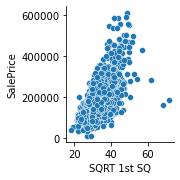

In [156]:
sns.pairplot(df, x_vars=['SQRT 1st SQ'], y_vars=['SalePrice']);

In [157]:
# Run to see all columns in df
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [158]:
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Yr Built or Remod,Overall Qual Sq,Garage Total,SQRT 1st SQ
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010,3961880,36,950.0,26.925824
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009,3986012,49,1118.0,30.215890
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,3919671,25,246.0,32.511536
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010,4026042,25,800.0,27.276363
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010,3786700,36,968.0,28.827071


### Identify Features to Use

#### Features:

Kitchen Qual - numerically scored //
Year Remod/Add * Year Built as Year_Remod_or_Built //
Overall Qual - not modifying //
Neighborhood - dummifying

#### Once Features have been decided upon, we need to Clean them and Feature Engineer them

In [159]:
# Engineer columns on df

df['Yr Built or Remod'] = df['Year Remod/Add'] * df['Year Built']
df['Lot Size House Sqft'] = df['Lot Area'] * df['Gr Liv Area']
df['Overall Qual Sq'] = (df['Overall Qual']**2)
df['Garage Total'] = df['Garage Area'] * df['Garage Cars']

### Once Features have been cleaned, we need to instantiate the model

In [160]:
# Instantiate the model

lr = LinearRegression()

### Do all of the Cleaning and Engineering stuff to the Test.csv for Kaggle

In [161]:
X = poly_columns[featpoly]

In [162]:
# Train, Test, Split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [163]:
# Fit the model

lr.fit(X, y)

LinearRegression()

In [164]:
# Train Score

lr.score(X_train, y_train)

0.7851285674102441

In [165]:
# Test Score

lr.score(X_validate, y_validate)

0.8286989464156638

In [166]:
# Cross-Val-score

cross_val_score(lr, X_train, y_train).mean()

0.7639874889484722

In [ ]:
# R2 score for the Baseline model is 0

In [193]:
# Baseline Model - in dollars
baseline = y.mean()
baseline

181469.70160897123

### Prediction

In [168]:
# Make Predictions 

preds = lr.predict(X_validate)
preds

array([146129.41116381, 199010.84503809, 265692.13931468, 115580.80503123,
       197188.90811245, 350678.0893046 , 168856.82495084, 303738.9986066 ,
       172960.2194492 , 110248.36601024, 138503.59169139, 224900.08905431,
       181893.75569899,  99765.00927411, 138645.99061283, 135172.53370261,
       101489.00720138, 186407.64446165, 351584.29965974, 225303.4509577 ,
       190736.51419438, 218450.18528602, 165332.97821335, 120939.23211139,
       141976.52661669, 264352.66749068, 162387.2982313 , 134069.07079032,
       213328.04047674, 102626.00576898, 305124.67993967, 122432.87895555,
       136443.37820413, 209994.95204549, 197146.78493622,  85285.5082289 ,
       174599.69697955, 202418.36120708, 290350.61153647, 109448.04928895,
       224138.65796902, 212956.4288664 , 268404.31517386, 158800.69533172,
        86009.0079807 , 175992.76888134, 129182.01147358, 102629.9133627 ,
       295779.96006597, 150461.89705144, 380987.35457406,  75783.18840161,
       143799.33322015, 1

In [169]:
# Residuals - Actual minus predictions
residuals = y_validate - preds

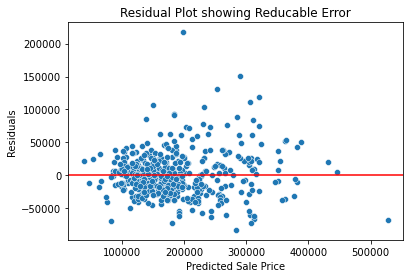

In [170]:
# Plot residuals to evaluate Epsilon (irreducable error)

plt.axhline(y=0, color='r')
sns.scatterplot(x = preds, y = residuals)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot showing Reducable Error');

714.8646536398721

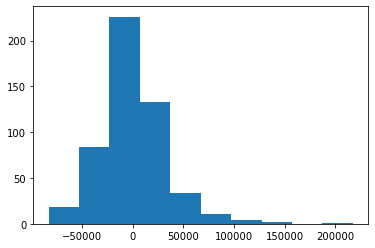

In [171]:
# Hist of residuals
plt.hist(residuals)
residuals.mean()

#### Modify Test Using Poly from Above

In [172]:
X_poly_test_df.shape

(878, 15)

In [173]:
test_preds = lr.predict(X_poly_test_df[featpoly])
test_preds

array([124576.027459  , 175160.92184189, 171509.27795323, 137787.23014333,
       178444.17422149,  86605.1968695 , 130259.22064365, 150470.28921767,
       196519.65159503, 179138.65406826, 182772.2569599 , 152607.96716   ,
       171029.67384558, 266252.69178479, 142487.64856297, 152728.81172763,
       158601.03338154, 129191.49705348, 192213.98123884, 194561.96548639,
       141302.0115594 , 138037.0218538 , 198979.9003538 , 164698.86382494,
       218151.118519  , 125156.33511088, 128948.98249894, 116136.58581899,
       162749.29952874,  48912.76952997, 116365.74502272,  99629.46413286,
       244703.58240449, 157423.1661842 , 228930.22373967, 168270.87163646,
       113654.89188293, 112408.03363957, 137779.05692371, 224591.03997108,
       153453.10387719, 192553.76946135, 164455.63336113, 151373.12294095,
       219885.64355155, 111733.82057613, 202448.95400468, 127145.8155035 ,
       131797.13370099, 130587.72176402, 107463.514765  , 230601.12282032,
       311809.00177129, 1

In [174]:
# Create target column (SalePrice) in df_test df
X_poly_test_df['SalePrice'] = test_preds

In [175]:
X_poly_test_df['SalePrice'].describe()

count       878.000000
mean     177986.975807
std       67558.756079
min       44071.599928
25%      130725.621782
50%      161745.657554
75%      207595.175962
max      474224.145116
Name: SalePrice, dtype: float64

In [176]:
kaggle_submission = X_poly_test_df[['Id', 'SalePrice']]

In [177]:
kaggle_submission.head()

,Id,SalePrice
0,2658,124576.027459
1,2718,175160.921842
2,2414,171509.277953
3,1989,137787.230143
4,625,178444.174221


In [178]:
kaggle_submission.set_index('Id', inplace=True)

In [179]:
kaggle_submission.head()

,SalePrice
Id,
2658,124576.027459
2718,175160.921842
2414,171509.277953
1989,137787.230143
625,178444.174221


In [180]:
# Save Submission to CSV
kaggle_submission.to_csv(f'../../kaggle_submissions/model{modelnum}.csv')